# Lab 3: Supervised Learning I - Regression Models

In this lab, we will cover the following topics:
1. Regression models for both continuous and binary outcomes:
    * Linear
    * Polynomial 
    * Logistic 
2. Apply regularization techniques to manage overfitting

Each section includes basic implementation and questions for further exploration.

## 1. Regression Models 
### 1.1 Linear Regression for Continuous Outcomes

We will start by implementing a linear regression model to predict continuous outcomes. We will also explore different parameters and visualize the results.

Mean Squared Error: 0.30916528527409337
R^2 Score: 0.9202053161791337


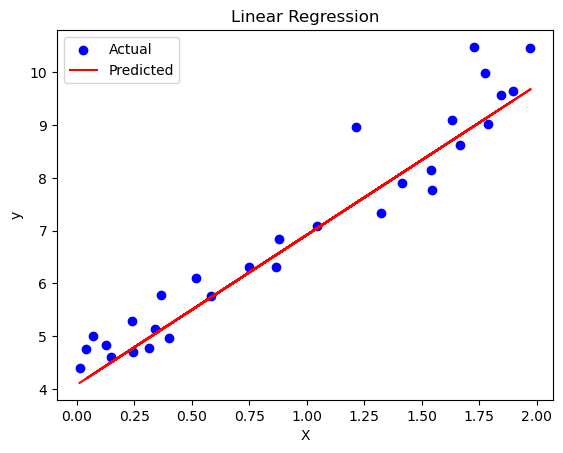

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

noise_factor = 0.7  # Adjust this to increase or decrease noise in the data

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) * noise_factor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()


In [ ]:
# LinearRegression?


### Questions for Exploration

1. How does changing the `test_size` parameter in the `train_test_split` function affect the model performance?
2. What happens to the model performance if you add noise to the data?
3. How does the model performance change if you use a different random seed for data generation?

### 1.2 Polynomial Regression for Continuous Outcomes

Next, we will implement a polynomial regression model to predict continuous outcomes. We will also explore different parameters and visualize the results.

Mean Squared Error: 4.685499436003907
R^2 Score: 0.7259387559546784


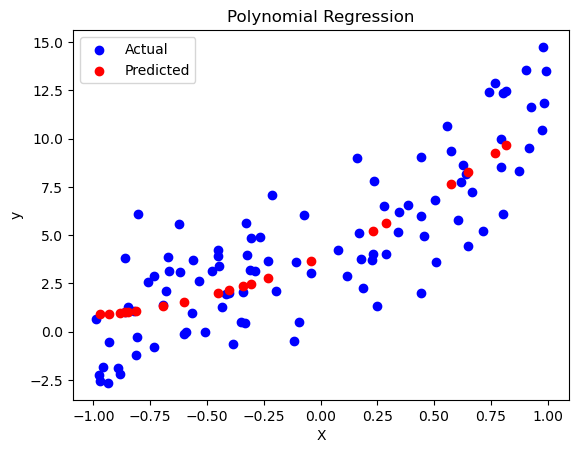

In [64]:
from sklearn.preprocessing import PolynomialFeatures

noise_factor = 2  # Adjust this to increase or decrease noise in the data

# Generate synthetic data
np.random.seed(82)
X = 2 * np.random.rand(100, 1) - 1
y = 4 + 3 * X + 2 * X**2 + 4* X**3 + np.random.randn(100, 1) * noise_factor

# Transform the data to include polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train a linear regression model on the polynomial features
poly_reg = LinearRegression()
poly_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = poly_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the results
plt.scatter(X[:, 0], y, color='blue', label='Actual')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

In [55]:
# PolynomialFeatures?
# train_test_split?

### Questions for Exploration

1. How does changing the degree of the polynomial features affect the model performance?
2. What happens to the model performance if you add higher-degree polynomial features?
3. How does the model performance change if you use a different random seed for data generation?

### 1.3 Logistic Model for Binary Outcomes

Next, we will implement a logistic regression model to predict binary outcomes. We will also explore different parameters and visualize the results.

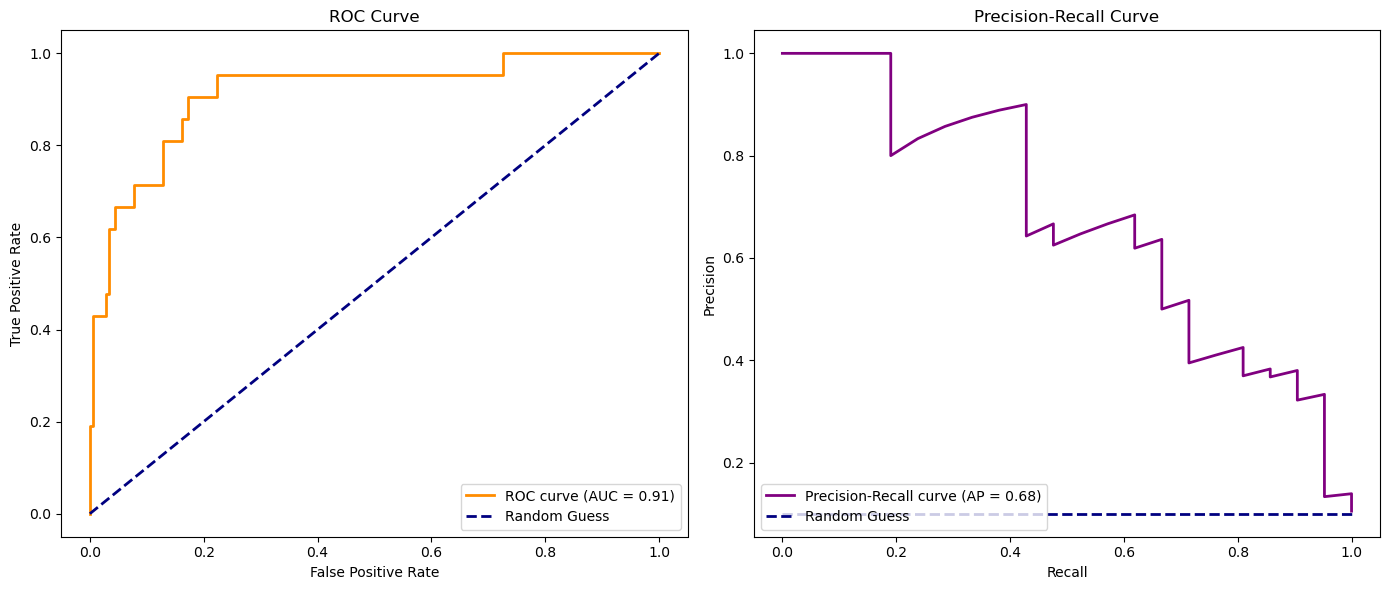

In [76]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score

minority_class = 0.1  # Proportion of minority class in the dataset

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[1-minority_class, minority_class], random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a logistic regression model
log_reg = LogisticRegression(C = 0.001, random_state=42)
log_reg.fit(X_train, y_train)

# Predict probabilities
y_scores = log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and PR area
precision, recall, _ = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

# Plot ROC curve and Precision-Recall curve as subplots on the same figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot ROC curve
axes[0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve')
axes[0].legend(loc='lower right')

# Plot Precision-Recall curve
axes[1].plot(recall, precision, color='purple', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
axes[1].plot([0,1],[minority_class,minority_class], color='navy', lw=2, linestyle='--', label='Random Guess')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve')
axes[1].legend(loc='lower left')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [74]:
# LogisticRegression?
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

### Questions for Exploration

1. How does changing the `C` parameter in the `LogisticRegression` model affect the model performance?
2. What happens to the ROC curve and AUC score when you change the class weights?
3. How does the model performance change if you use a different random seed for data generation?

## 2 Regularization Techniques to Manage Overfitting

Finally, we will apply regularization techniques such as Ridge and Lasso regression to manage overfitting. We will also explore different parameters and visualize the results.

/Users/caryngeady/Documents/GitHub/BINF-5507-caryngeady/.pixi/envs/default/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.796e+02, tolerance: 1.413e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Linear Regression - Mean Squared Error: 0.862685358860779, R^2 Score: 0.9481841042684817
Ridge Regression - Mean Squared Error: 0.9656525371570456, R^2 Score: 0.9419995359092671
Lasso Regression - Mean Squared Error: 0.9863962188866771, R^2 Score: 0.9407535979336767


ValueError: x and y must be the same size

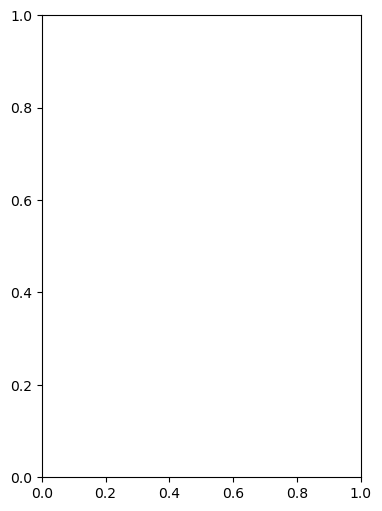

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + np.random.randn(1000, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Model with no regularization
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Train a Ridge regression model
ridge_reg = ElasticNet(alpha=0.1,l1_ratio=0.0)
ridge_reg.fit(X_train, y_train)

# Train a Lasso regression model
lasso_reg = ElasticNet(alpha=0.1,l1_ratio=1.0)
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluate the models
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Linear Regression - Mean Squared Error: {mse}, R^2 Score: {r2}")
print(f"Ridge Regression - Mean Squared Error: {mse_ridge}, R^2 Score: {r2_ridge}")
print(f"Lasso Regression - Mean Squared Error: {mse_lasso}, R^2 Score: {r2_lasso}")

# Plot the results
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Linear Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()

# Plot the results
plt.subplot(1, 3, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_ridge, color='red', label='Ridge Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge Regression')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_lasso, color='green', label='Lasso Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Lasso Regression')
plt.legend()

plt.show()


In [37]:
# Ridge?
Lasso?
# ElasticNet?

Init signature:
Lasso(
    alpha=1.0,
    *,
    fit_intercept=True,
    precompute=False,
    copy_X=True,
    max_iter=1000,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Linear Model trained with L1 prior as regularizer (aka the Lasso).

The optimization objective for Lasso is::

    (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

Technically the Lasso model is optimizing the same objective function as
the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).

Read more in the :ref:`User Guide <lasso>`.

Parameters
----------
alpha : float, default=1.0
    Constant that multiplies the L1 term, controlling regularization
    strength. `alpha` must be a non-negative float i.e. in `[0, inf)`.

    When `alpha = 0`, the objective is equivalent to ordinary least
    squares, solved by the :class:`LinearRegression` object. For numerical
    reasons, using `alpha = 0` with the `Lasso` object is not advised.

### Questions for Exploration

1. How does changing the `alpha` parameter in the `Ridge` and `Lasso` models affect the model performance?
2. What happens to the model performance if you use different values of `alpha`?
3. Try implementing an `ElasticNet` model in the cell above.
    * How does it compare to the `Ridge` and `Lasso` models?
    * How does changing `alpha` affect the model performance? 
4. How does the model performance change if you use a different random seed for data generation?

## Extensions

1. Create new features from the existing ones (e.g., interaction terms, polynomial features) and evaluate their impact on model performance.
2. How does feature scaling (e.g., standardization, normalization) affect the performance of linear, polynomial, and logistic models?
3. Compare the performance of linear, polynomial, and logistic models on the same dataset using various evaluation metrics (e.g., R^2, MSE, ROC AUC).